## Project Name: Telco Customer Churn Analysis

#### This exploratory data analysis (EDA) is aim to uncover patterns and insights related to customer behavior and retention. The analysis involves examining various factors that influence churn, such as customer demographics, service usage, and account details. Our goal is to identify key drivers of churn, enabling cilent to develop targeted strategies for improving customer satisfaction and reducing attrition.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loading dataset 
df = pd.read_csv('Telco-Customer-Churn.csv')
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
# Inspection of data or understanding our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 `TotalCharges` columns having blanck values due to this data type is incorrect , we need to replace blanck values with  0 and also we will change data type to float

In [8]:
df['TotalCharges']=df['TotalCharges'].replace(" ",0)
df['TotalCharges']=df['TotalCharges'].astype("float")


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isnull().sum().sum()

0

No null values found in our data

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [13]:
df.duplicated().sum()

0

No duplicate records found

In [16]:
def convert(value):
    if value ==1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(convert)

Converted 1 and 0 values to Yes/No to make it easier to understand

In [42]:
df['SeniorCitizen'].unique()

array(['No'], dtype=object)

We can see that there are no Senior Citizens who are chruned out

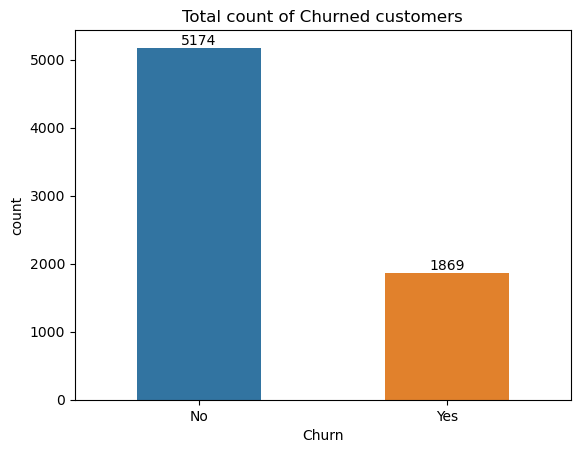

In [40]:
a=sns.countplot(x='Churn', data= df, width=0.5)
a.bar_label(a.containers[0])
plt.title('Total count of Churned customers')
plt.show()

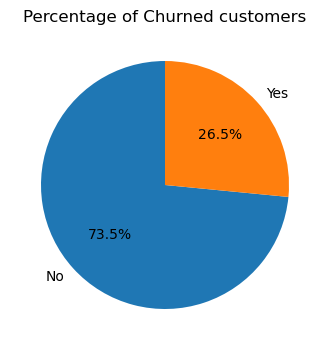

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [30]:
# now we will show the same into percentage
plt.figure(figsize=[4,5])
x = df['Churn'].value_counts()
plt.pie(x,labels=x.index,autopct='%1.1f%%',startangle=90)
plt.title('Percentage of Churned customers')
plt.show()
print(x)

We can see that total 26.5% customers out of 100% have churned out

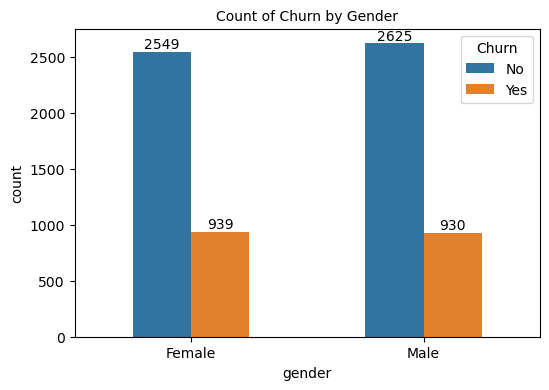

In [39]:
plt.figure(figsize=(6,4))
gen=sns.countplot(x='gender',data=df, hue='Churn',width=0.5)
gen.bar_label(gen.containers[0])
gen.bar_label(gen.containers[1])
plt.title('Count of Churn by Gender',size=10)
plt.show()

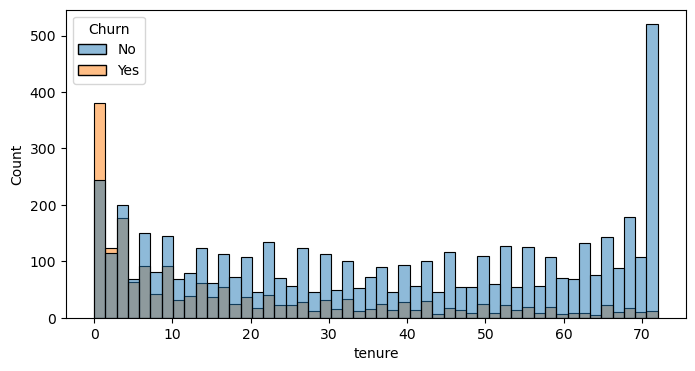

In [51]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,4))
sns.histplot(x='tenure',data=df,bins=50,hue='Churn')
plt.title('
plt.show()

People with short tenure have churned out and people with long tenure have stayed with the client

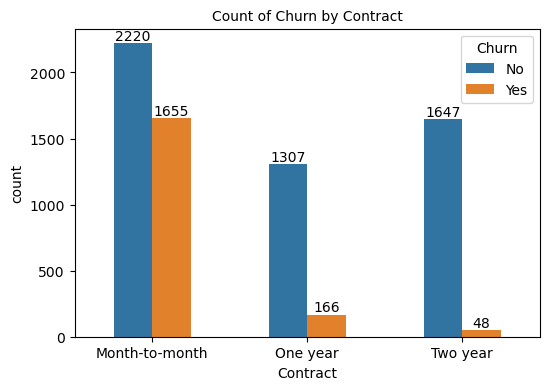

In [52]:
plt.figure(figsize=(6,4))
con=sns.countplot(x='Contract',data=df, hue='Churn',width=0.5)
con.bar_label(con.containers[0])
con.bar_label(con.containers[1])
plt.title('Count of Churn by Contract',size=10)
plt.show()

People with month tp month cotract have churned out more as conpared to people with one/two year contract

In [54]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

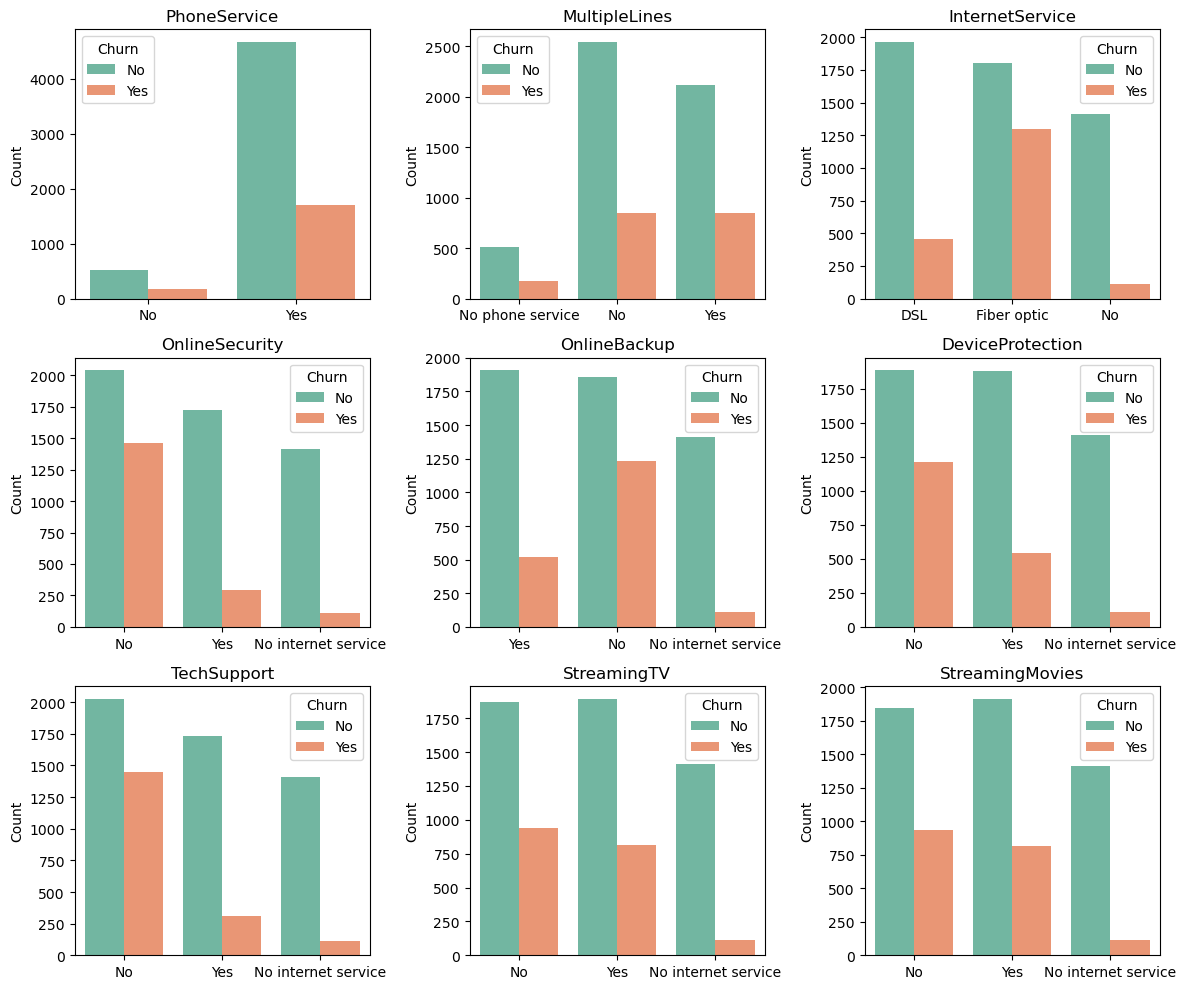

In [59]:
# List of features for subplots
features = ['PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Generate count plots for each feature
for ax, feature in zip(axes, features):
    sns.countplot(x=feature, data=df, ax=ax, palette='Set2', hue ='Churn')
    ax.set_title(feature)
    ax.set_xlabel('')  # Optional: Remove x-label for cleaner look
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

We have shown reasons for churning of customers based on various factors

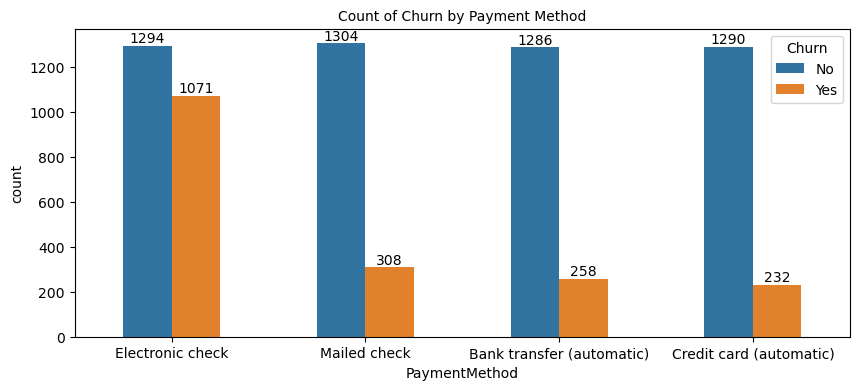

In [62]:
plt.figure(figsize=(10,4))
pay=sns.countplot(x='PaymentMethod',data=df, hue='Churn',width=0.5)
pay.bar_label(pay.containers[0])
pay.bar_label(pay.containers[1])
plt.title('Count of Churn by Payment Method',size=10)
plt.show()

The observation indicates that customers using electronic checks have higher churn rates compared to those using other payment methods such as mailed checks, bank transfers, and automatic credit card payments. 

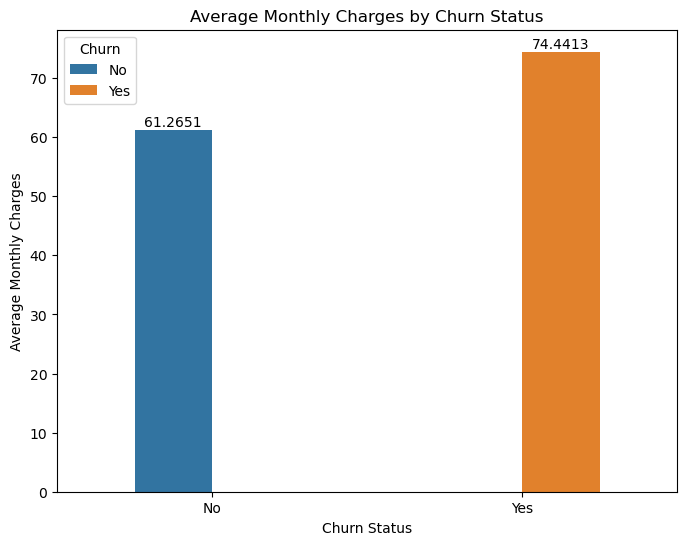

In [69]:
# Calculate average monthly charges
average_charges = df.groupby('Churn')['MonthlyCharges'].mean().reset_index()

plt.figure(figsize=(8, 6))
m=sns.barplot(x='Churn', y='MonthlyCharges', data=average_charges, hue='Churn',width =0.5)
m.bar_label(m.containers[0])
m.bar_label(m.containers[1])
plt.title('Average Monthly Charges by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average Monthly Charges')

plt.show()


Average monthly charges are high in case of customers who have churned out as compared to the customers who have not chruned out